Euler:
- Tempo de queda: 20.30 s
- Velocidade final: 62.44 m/s

Runge-Kutta 4:
- Tempo de queda: 20.40 s
- Velocidade final: 62.43 m/s


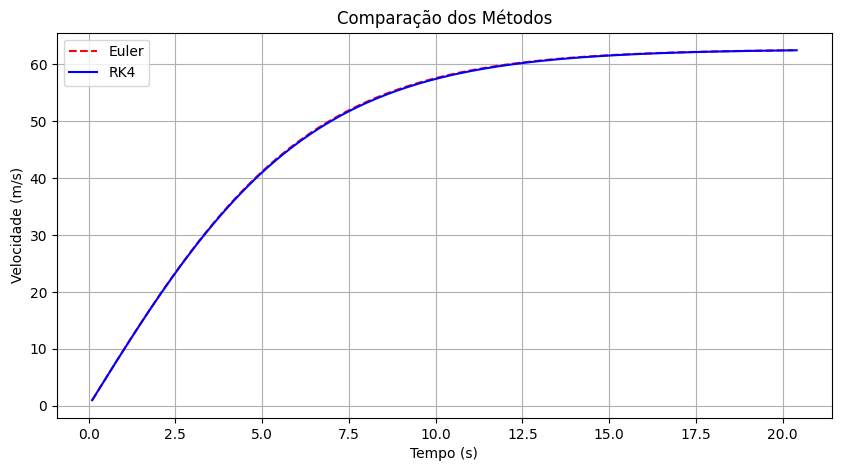

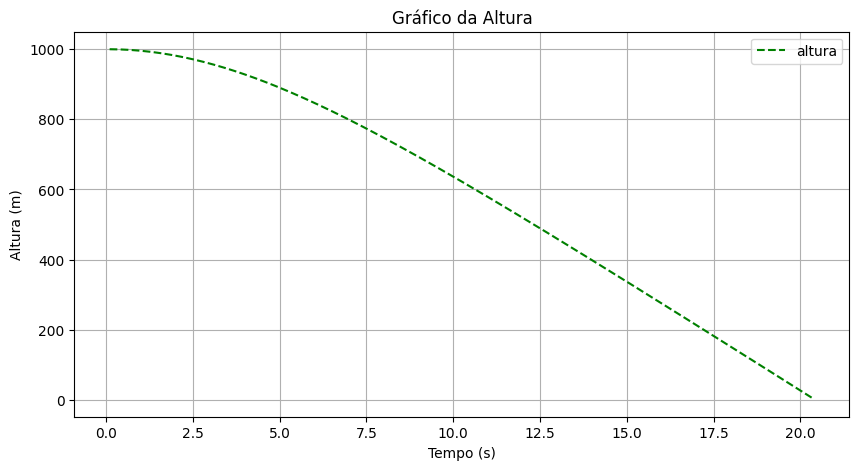

In [1]:
import matplotlib.pyplot as plt
import numpy as np

passo = 0.1  # passo de tempo (s) 

# Função dada na questão
def function(v):
    return 9.81 - (0.225/90) * v**2

# Método de Euler
def euler_method(f, t, v): #(t,v) está para (x,y)

    h = 1000  # Altura inicial
    
    listVelocidade = []
    listTempo = []

    while h > 0:
        v = v + passo * f(v)
        h = h - v * passo
        t += passo
        
        listVelocidade.append(v)
        listTempo.append(t)

    return listTempo, listVelocidade

# Método de Runge-Kutta 4
def kutta4(f, t, v): #(t,v) está para (x,y)

    # Aumentei a altura para 1000000 encontrar a velocidade terminal
    h = 1000  # Altura inicial

    listVelocidade = []
    listTempo = []
    listAltura = []


    while h > 0:
        listAltura.append(h)
        
        k1 = f(v)
        k2 = f(v + 0.5 * passo * k1)
        k3 = f(v + 0.5 * passo * k2)
        k4 = f(v + passo * k3)
        v = v + (passo / 6) * (k1 + 2*k2 + 2*k3 + k4)
        h = h - v * passo
        t += passo

        #print(v) # Printar velocidade para perceber o padrão
        listVelocidade.append(v)
        listTempo.append(t)

    return listTempo, listVelocidade, listAltura # Retorno a altura também, nesse, apenas para montar o gráfico de altura (extra)

# Obsrvação:
# Parâmetros comuns: (função, tempo inicial, **tempo final**, velocidade inicial)
# Tirei o tempo final pois não o temos, a condição de parada é enquanto o paraquedista não atinge o chão

tempo_euler, velocidade_euler = euler_method(function, 0, 0) 
tempo_rk4, velocidade_rk4, altura_kutta4 = kutta4(function, 0, 0)

# Exibir os resultados (Pega o valor do último índice dos vetores)
print("Euler:")
print(f"- Tempo de queda: {tempo_euler[len(tempo_euler)-1]:.2f} s")
print(f"- Velocidade final: {velocidade_euler[len(velocidade_euler)-1]:.2f} m/s\n")
print("Runge-Kutta 4:")
print(f"- Tempo de queda: {tempo_rk4[len(tempo_rk4)-1]:.2f} s")
print(f"- Velocidade final: {velocidade_rk4[len(velocidade_rk4)-1]:.2f} m/s")

# Exibe o gráfico da comparação dos métodos
plt.figure(figsize=(10,5))
plt.plot(tempo_euler, velocidade_euler, label="Euler", linestyle="dashed", color="red")
plt.plot(tempo_rk4, velocidade_rk4, label="RK4", linestyle="solid", color="blue")
plt.xlabel("Tempo (s)")
plt.ylabel("Velocidade (m/s)")
plt.title("Comparação dos Métodos")
plt.legend()
plt.grid()
plt.show()

# Exibe o gráfico da altura
plt.figure(figsize=(10,5))
plt.plot(tempo_rk4, altura_kutta4, label="altura", linestyle="dashed", color="green")
plt.xlabel("Tempo (s)")
plt.ylabel("Altura (m)")
plt.title("Gráfico da Altura")
plt.legend()
plt.grid()
plt.show()
